In [1]:
text_data ="""
Peeyush :  Please tell us from the beginning what you do. You don't need to explain what you do because you're just giving us your version one, but we have no clue whose version that is.

Peeyush : What is Orbo?

Peeyush : First, we’ll check the current one, then we’ll come back to the new one; otherwise, we get confused

Vinita :  Mirror, mirror on the wall, let’s get some makeup! I’m going to try a red lipstick. [Music] So, this red lipstick, you can see the product name too.

Vinita :  Yeah, so what I’ve noticed with the bad products is that the eyeliner gets all over the place, it doesn’t stay where it’s supposed to. Like, you just put on your eyeliner, and look, I’ve got this pink one, and I used a blue color too. Yeah, it’s showing up right by my eye, which I actually like because it doesn’t smudge everywhere. And when you move, it doesn’t budge either. It moves with me, which is a good thing. I'm putting on a black lipstick now.

Vinita :  Nice technology , bro, or the Technology is amazing.

Peeyush : Alright, this is your current product. This is an assisting product that’s already selling. What you just showed

Vinita : I just want to do this for a second. Yeah, a vintage Hollywood red carpet look is what I’m going for. First, it’ll show on this model, and then you can try it on yourself so I can see how it looks on my face.

Peeyush : Now, with their facial detection, you’re creating the whole look for them, and then the products will pop up.

Vinita :Your old products were better compared to these ones. If asked, they wouldn’t hold up. I think the use case is interesting. You can search for "I want a wedding look for my music party" and it will show you options to curate a complete look. Just a heads up, I met Manoj because of our online e-commerce.

V : Trying on lipstick while shopping is pretty common, so we're looking into this magic mirror product for our stores. We evaluated their technology along with others, and honestly, I thought their tech was really good—better than a lot of the rest. But do you think it makes any sense? We were planning to pilot it in one store, and just thinking about it.

Peeyush :  Right now, what’s the monthly revenue?

P : So, in India, the big beauty brands, do they use your product ?

P : Let me ask you, how long have you been running this company?

P : Do you think that's a great outcome?

P : We're already on track to reach a crore, which is great because I think that's your weak spot. You'll need to boost your sales in your business. Right now, you're looking at needing around six crores just to keep things running. We need a big round of funding

P : what price you’ve set.

P : Generally, it’s not going to happen at 0000 per month per mirror. That’s just unrealistic, man. First off, you won't get it with just one mirror; you'll need two for a retail store. The total average rent is around 6 to 7 thousand. You'll end up giving 10% of the revenue

V : Beauty is a category where education and engagement play a crucial role in decision-making, and right now, it’s just not investable.But if you can secure a term sheet within the next three months for 3 million, then I have an offer for you, which is 10 million at a valuation that matches your last round’s post-money value.

P : The initial product you created is a good one. If I were your advisor, I’d say do whatever it takes—even if you have to give it away for 10 cents—to get them as your client. Because you're serving sugar to 10 other small retailers, your work is practically done. They are providing marketing support for you more than anyone else. Anything else? You just laid out your strategy, and I have a lot of experience in this. Yeah, I’m a good strategic investor for you guys, but I can’t match this valuation. You can sell me the company .

P : I’m willing to buy a majority stake for 15 crores, 51% of your company. Okay, I’ll put in primary capital into the company, dilute everybody. It’s an offer right now on the table, provided due diligence shows that your technology and your team are already solid.

P : You guys need money, and I can help you out.

P : I totally understand, and I'm not trying to lowball you with my offer, but I can't pay that price for this business

P : But you guys know what it's about out there. You know the value I bring to the table.

P : these 15-minute decisions can affect years of decisions. If you keep doing the current business, we’re not buying you out right now. We’ll make a business plan to grow the company

P : You figure out which one you want to go for without any outside influence and just let me know." "I'll respect you in both ways, and we'll meet outside.



"""

In [2]:
import pandas as pd
rows = []
for line in text_data.strip().split("\n"):
    if " : " in line:
        name, statement = line.split(" : ", 1)
        rows.append({"name": name.strip(), "statement": statement.strip()})

# Create a DataFrame
df = pd.DataFrame(rows)

In [4]:
df["name"].replace("P","Peeyush",inplace=True)
df["name"].replace("V","Vinita",inplace=True)

<ipython-input-4-e4c2a06c98c9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["name"].replace("P","Peeyush",inplace=True)
<ipython-input-4-e4c2a06c98c9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [5]:
v = df[df["name"]=="Vinita"]
p = df[df["name"]=="Peeyush"]

## Sentiment analysis for Peeyush

In [6]:
from textblob import TextBlob


In [8]:
def get_sentiment(text):
    blob =  TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

In [14]:
df[["Polarity", "Subjectivity"]] = df["statement"].apply(get_sentiment).apply(pd.Series)

# function to label the sentiment
df['Label'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
df['Emotions'] = df['Subjectivity'].apply(lambda x: 'Objective' if x < 0.5 else 'Subjective')

# displaying the results
#df

In [15]:
df[df["Subjectivity"]>0.5]

,name,statement,Polarity,Subjectivity,Label,Emotions
5,Vinita,"Nice technology , bro, or the Technology is am...",0.600000,0.950000,Positive,Subjective
9,Vinita,Trying on lipstick while shopping is pretty co...,0.250000,0.720000,Positive,Subjective
10,Peeyush,"Right now, what’s the monthly revenue?",0.285714,0.535714,Positive,Subjective
13,Peeyush,Do you think that's a great outcome?,0.800000,0.750000,Positive,Subjective
16,Peeyush,"Generally, it’s not going to happen at 0000 pe...",-0.085000,0.596667,Negative,Subjective
21,Peeyush,"I totally understand, and I'm not trying to lo...",0.000000,0.750000,Neutral,Subjective


In [17]:
corpus = ""
for text in df[(df['Emotions'] == 'Objective') & ( df['Label'] == 'Positive')]['statement']:
    corpus += text + " "

In [21]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
# tokenizing the corpus
words = word_tokenize(corpus)

# getting the list of stop words
stop_words = set(stopwords.words('english'))

# removing the stop words and puntuation marks from the corpus
# words = [word for word in words if word.isalnum() and word not in stop_words]
words = [word.lower() for word in words]
words = [word for word in words if word not in stop_words]
words = [word for word in words if word.isalnum()]
words = [word for word in words if word != "i"]

#calculate word frequency
words_frequency = Counter(words)

#print the most common words
print('Word Frequency:')
for word , freq in words_frequency.most_common(20):
    print(f"{word}: {freq}")

Word Frequency:
right: 5
yeah: 4
company: 4
look: 3
good: 3
business: 3
10: 3
products: 2
eyeliner: 2
like: 2
put: 2
one: 2
already: 2
need: 2
crores: 2
keep: 2
round: 2
million: 2
offer: 2
valuation: 2


In [40]:
words_frequency

Counter({'yeah': 4,
         'noticed': 1,
         'bad': 1,
         'products': 2,
         'eyeliner': 2,
         'gets': 1,
         'place': 1,
         'stay': 1,
         'supposed': 1,
         'like': 2,
         'put': 2,
         'look': 3,
         'got': 1,
         'pink': 1,
         'one': 2,
         'used': 1,
         'blue': 1,
         'color': 1,
         'showing': 1,
         'right': 5,
         'eye': 1,
         'actually': 1,
         'smudge': 1,
         'everywhere': 1,
         'move': 1,
         'budge': 1,
         'either': 1,
         'moves': 1,
         'good': 3,
         'thing': 1,
         'putting': 1,
         'black': 1,
         'lipstick': 1,
         'want': 1,
         'second': 1,
         'vintage': 1,
         'hollywood': 1,
         'red': 1,
         'carpet': 1,
         'going': 1,
         'first': 1,
         'show': 1,
         'model': 1,
         'try': 1,
         'see': 1,
         'looks': 1,
         'face': 1,
      

In [36]:
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import word_tokenize

words = word_tokenize(corpus)
words = [word.lower() for word in words]
words = [word for word in words if word not in stop_words]
words = [word for word in words if word.isalnum()]
words = [word for word in words if word != "i"]


# Generate bigrams
bigrams = list(ngrams(words, 2))

# Count bigram frequency
bigram_freq = Counter(bigrams)

# Print most common bigrams
print("Most Common Bigrams:")
for bigram, freq in bigram_freq.most_common(50):
    print(f"{bigram}: {freq}")

Most Common Bigrams:
('yeah', 'noticed'): 1
('noticed', 'bad'): 1
('bad', 'products'): 1
('products', 'eyeliner'): 1
('eyeliner', 'gets'): 1
('gets', 'place'): 1
('place', 'stay'): 1
('stay', 'supposed'): 1
('supposed', 'like'): 1
('like', 'put'): 1
('put', 'eyeliner'): 1
('eyeliner', 'look'): 1
('look', 'got'): 1
('got', 'pink'): 1
('pink', 'one'): 1
('one', 'used'): 1
('used', 'blue'): 1
('blue', 'color'): 1
('color', 'yeah'): 1
('yeah', 'showing'): 1
('showing', 'right'): 1
('right', 'eye'): 1
('eye', 'actually'): 1
('actually', 'like'): 1
('like', 'smudge'): 1
('smudge', 'everywhere'): 1
('everywhere', 'move'): 1
('move', 'budge'): 1
('budge', 'either'): 1
('either', 'moves'): 1
('moves', 'good'): 1
('good', 'thing'): 1
('thing', 'putting'): 1
('putting', 'black'): 1
('black', 'lipstick'): 1
('lipstick', 'want'): 1
('want', 'second'): 1
('second', 'yeah'): 1
('yeah', 'vintage'): 1
('vintage', 'hollywood'): 1
('hollywood', 'red'): 1
('red', 'carpet'): 1
('carpet', 'look'): 1
('look'

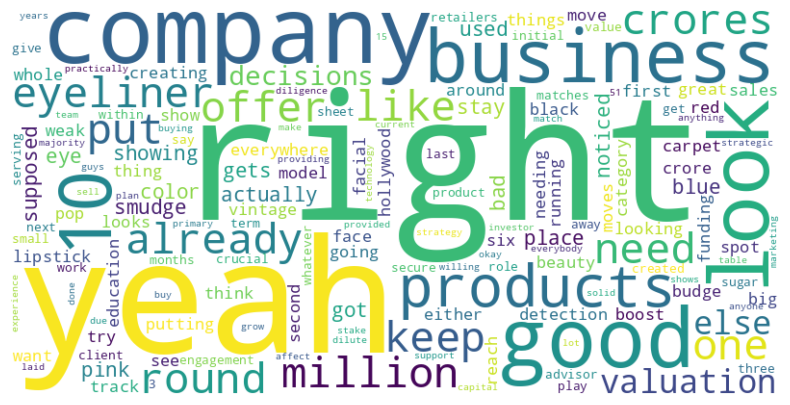

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Generate and display a word cloud
wordCloud = WordCloud(width = 800 , height = 400 , background_color='white').generate_from_frequencies(words_frequency)

#Plot the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordCloud, interpolation='bilinear')
# plt.title('Word Cloud')
plt.axis('off')
plt.show()